In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
data_train = pd.read_csv('./mnist_train.csv')
data_test = pd.read_csv('./mnist_test.csv')
data_train['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [147]:
train = data_train.to_numpy()
test = data_test.to_numpy()

m, n = train.shape

data_transpose = train.T

test_transpose = test.T
o, p = test_transpose.shape

Y_test = test_transpose[0,:]
X_test = test_transpose[1:p]
X_test = X_test / 255

In [133]:
Y_train = data_transpose[0,:]
X_train = data_transpose[1:n]
X_train = X_train / 255
X_train.shape

(784, 60000)

#Create a neural network of 2 layers

- 10 neurons in each layer
- W1, b1 - wieght and bias of 1st layer
- W2, b2 - weight and bias of 2nd layer


  #Shape of W1 = (10,n) and b1(10,1)
  
  For W2 :
      -There are 10 inputs each as a output of neurons of layer1 .
      - Each neuron has 10 inputs. So 10 parameters for each
      - W2 = (10,10) and b2 = (10,1)
  
   

In [134]:
#def init_params():
   # W1 = np.zeros([10,n-1])
   # b1 = np.zeros([10,1])
   # W2 = np.zeros([10,10])
   # b2 = np.zeros([10,1])

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

    return W1,b1,W2,b2
    
def Relu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def one_hot_y(Y):
    #creating a one hot encoding label for true value
    one_hot_Y = np.zeros([Y.size,Y.max()+1])

    # if 5 is present in Y then 5th index of one_hot_Y should be 1
    one_hot_Y[np.arange(Y.size),Y] = 1
    return one_hot_Y.T


#Z1 and Z2  = unactivated linear combination for layer 1 and 2 respectively

A1 and A2 are activated output of  layer 1 and 2 respectuvely

Z1 = W1 * X + b1   

A1 = Relu(Z1)

Z2 = W2 * A1 + b2

In [135]:
#Forward propagation: 

def forward_propagation(W1,W2,b1,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,Z2,A1,A2

def ReLU_deriv(Z):
    return Z > 0

Backward propagation :

decreasing the error in paramters by using partial derivatives
exactly like logistic regression

-parameters  = W1,W2,b1,b2

dW1,dW2,db1,db2 = partial derivaties of cost/loss function w.r to W1,W2,b1,b2

deriving formula .....

In [136]:
def backward_propagation(W1,W2,b1,b2,A1,A2,Z1,Z2,X,Y):
    one_hot_Y = one_hot_y(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,W2,b1,b2,dW1,dW2,db1,db2,alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return W1,W2,b1,b2

def predict_value(A):
    return np.argmax(A,0)

def get_accuracy(prediction,Y):
    print(prediction,Y)
    return np.sum(prediction == Y)/(Y.size)

A is a matrix of size (10,60000) where 10 for 10 classes 0-9 and 60000 for 60000 images .
Each column represents an image

each row in the column is a probability value of the image being that number

for eg if col 1 has 0.8 in 5 index -> 80% probab of the number being 5

argmax returns the max value in a list in an axis
here axis 0 means each columnn

predict_value returns a list of size(1,60000)

In [137]:
def get_accuracy(prediction,Y):
    print(prediction,Y)
    accuracy =  np.sum(prediction == Y)/Y.size
    return accuracy
    

In [138]:


def gradient_descent(alpha,epoch,X,Y):

    W1,b1,W2,b2 = init_params()

    for i in range(epoch):
        #forward propagation
        Z1,Z2,A1,A2 = forward_propagation(W1,W2,b1,b2,X)
    
        #to minimize the loss that has occurred in A2/prediction matrix we take partial derivative of loss
        #function w.r to params
        dW1,db1,dW2,db2 = backward_propagation(W1,W2,b1,b2,A1,A2,Z1,Z2,X,Y)
    
        #then we update the parameter
        #Stochastic Gradient Descent is being used here

        W1,W2,b1,b2 = update_params(W1,W2,b1,b2,dW1,dW2,db1,db2,alpha)

        if i%10 == 0:
            print("Iterations : ",i)
            prediction = predict_value(A2)
            print(get_accuracy(prediction,Y))

    return W1,W2,b1,b2
            
    

In [139]:
learning_rate = 0.1
epoch = 300

W1,W2,b1,b2 = gradient_descent(learning_rate,epoch,X_train,Y_train)

Iterations :  0
[4 4 3 ... 7 3 4] [5 0 4 ... 5 6 8]
0.15536666666666665
Iterations :  10
[2 0 3 ... 1 1 0] [5 0 4 ... 5 6 8]
0.2648
Iterations :  20
[2 0 3 ... 7 3 0] [5 0 4 ... 5 6 8]
0.34431666666666666
Iterations :  30
[5 0 3 ... 7 3 0] [5 0 4 ... 5 6 8]
0.42485
Iterations :  40
[5 0 3 ... 7 6 0] [5 0 4 ... 5 6 8]
0.48395
Iterations :  50
[5 0 2 ... 7 6 0] [5 0 4 ... 5 6 8]
0.5296833333333333
Iterations :  60
[5 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.5666166666666667
Iterations :  70
[5 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.5975166666666667
Iterations :  80
[0 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6231166666666667
Iterations :  90
[0 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6455166666666666
Iterations :  100
[0 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.66425
Iterations :  110
[0 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6808333333333333
Iterations :  120
[0 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6946833333333333
Iterations :  130
[0 0 2 ... 0 6 8] [5 0 4 ... 5 6 8]
0.7061833333333334
Iterations :  140
[0 0 2 ... 0 6

4


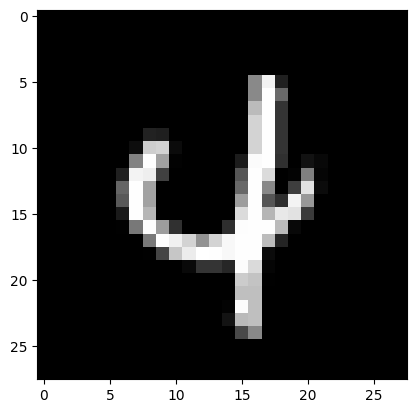

In [156]:
def make_prediction(W1,W2,b1,b2,X):
    _,_,_,A2 = forward_propagation(W1,W2,b1,b2,X)
    prediction = predict_value(A2)
    return prediction

def testing(W1,W2,b1,b2,index,X,Y):

    image = X_test[:,index]
    prediction = make_prediction(W1,W2,b1,b2,X)[index]
    label = Y_test[index]

    print(prediction)
    
    image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()
    
testing(W1,W2,b1,b2,1300,X_test,Y_test)


In [148]:
#getting accuracy in test set
_,_,_,A2 = forward_propagation(W1,W2,b1,b2,X_test)
prediction = predict_value(A2)
get_accuracy(prediction,Y_test)

[7 2 1 ... 4 8 6] [7 2 1 ... 4 5 6]


np.float64(0.8084)